In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df  = pd.read_csv('raw.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape

(1000, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df['test_preparation_course'].value_counts()

test_preparation_course
none         642
completed    358
Name: count, dtype: int64

In [8]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [12]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [13]:
# define numerical and categorical features
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O'] # 'O mean object
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']


print('we have {} numerical features : {}'.format(len(numeric_features) , numeric_features))
print('\nwe have {} categorical features : {}'.format(len(categorical_features) , categorical_features))


we have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

we have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [14]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [15]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [16]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writting_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()
print(reading_full , "\n" , writting_full , "\n" , math_full)

17 
 14 
 7


## visulazation of Data

### Histogram & Kde plt

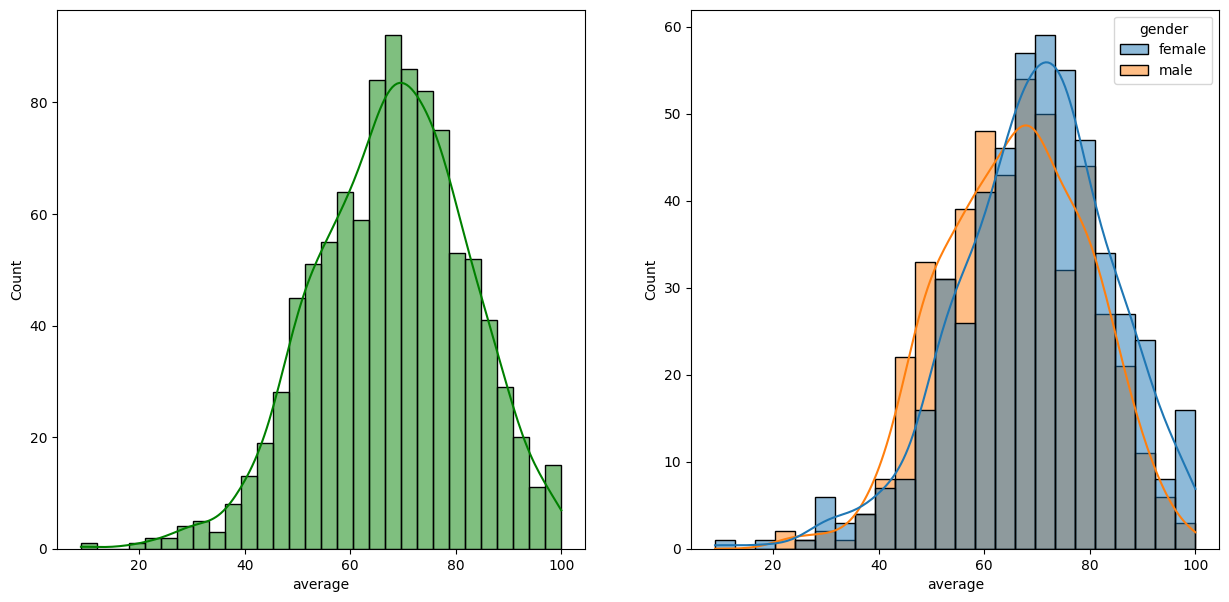

In [17]:
fig , axs  =plt.subplots(1 ,2 , figsize = (15 , 7))
plt.subplot(121)
sns.histplot(data =df , x = 'average' , bins = 30 , kde = True , color = 'g')
plt.subplot(122)
sns.histplot(data =df , x = 'average'  , kde = True , hue = 'gender')
plt.show()

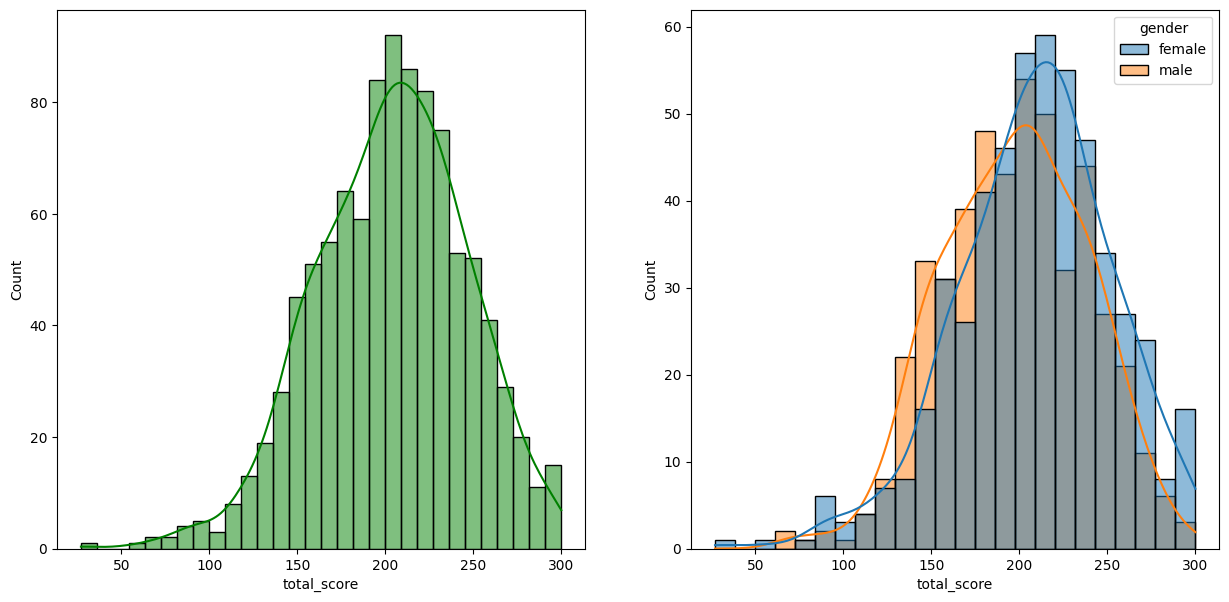

In [18]:
fig , axs  =plt.subplots(1 ,2 , figsize = (15 , 7))
plt.subplot(121)
sns.histplot(data =df , x = 'total_score' , bins = 30 , kde = True , color = 'g')
plt.subplot(122)
sns.histplot(data =df , x = 'total_score'  , kde = True , hue = 'gender')
plt.show()

- female student perform well than male


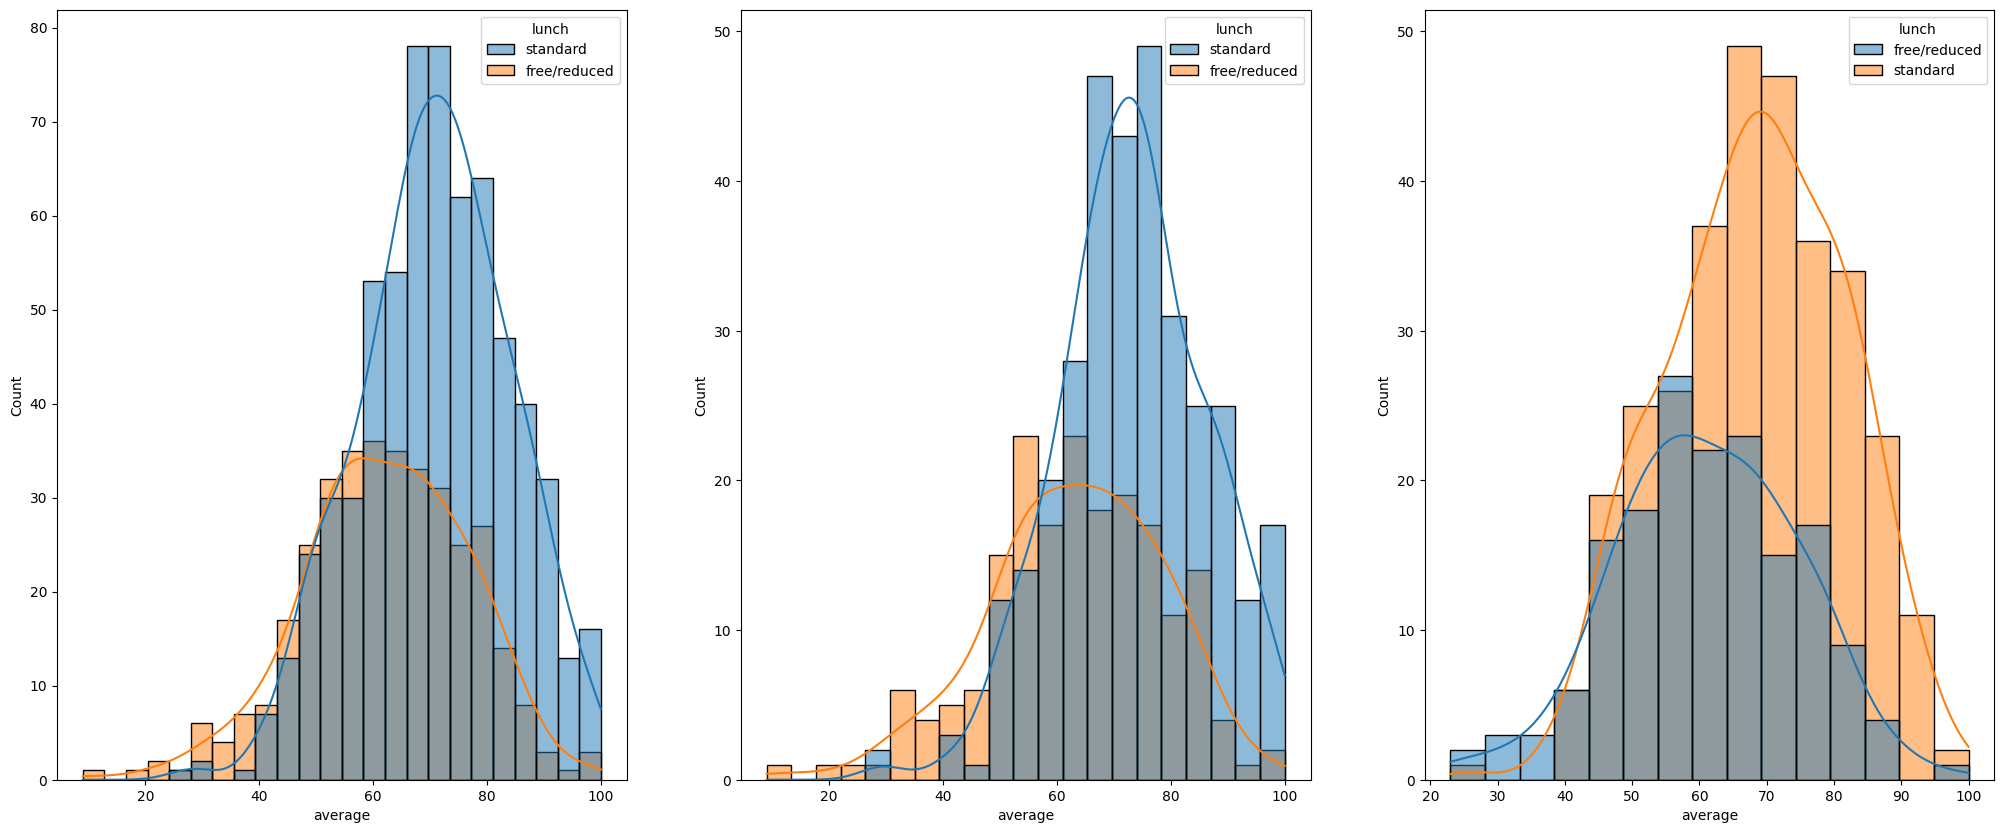

In [19]:
plt.subplots(1 , 3 , figsize = (25 , 10))
plt.subplot(131)
sns.histplot(data = df , x = 'average' , kde =True , hue = 'lunch')
plt.subplot(132)
sns.histplot(data = df[df['gender'] == 'female'] , x = 'average' , kde =True , hue = 'lunch')
plt.subplot(133)
sns.histplot(data = df[df['gender'] == 'male'] , x = 'average' , kde =True , hue = 'lunch')
plt.show()


In [20]:
df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


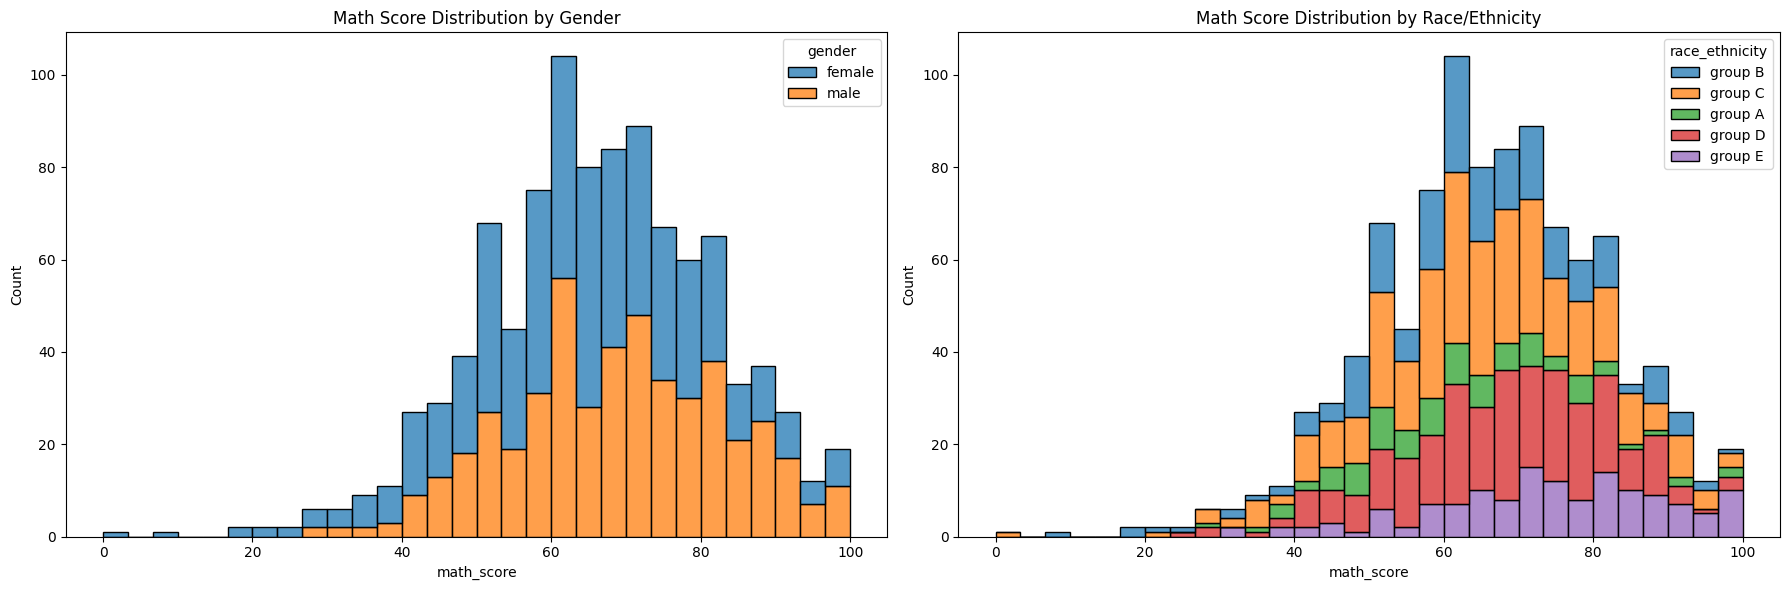

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Histogram of math_score by gender
sns.histplot(data=df, x='math_score', hue='gender', multiple='stack', bins=30, ax=axs[0])
axs[0].set_title('Math Score Distribution by Gender')

# Histogram of math_score by race_ethnicity
sns.histplot(data=df, x='math_score', hue='race_ethnicity', multiple='stack', bins=30, ax=axs[1])
axs[1].set_title('Math Score Distribution by Race/Ethnicity')

plt.tight_layout()
plt.show()

In [ ]:
make hist plot about gender ,race_ethnicity and math_score.
